# Evaluate on Test Data

## Setup

In [1]:
from importlib import reload

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

from hot_dust import preprocess, model

In [14]:
# "reload" to get changes in preprocess.py without restarting the kernel
reload(preprocess)
reload(model)
from hot_dust.preprocess import prepare_training_data, split_training_data, sensitivity_analysis
from hot_dust.model import to_tensorflow

In [3]:
ds = prepare_training_data()
train, validate, test = to_tensorflow(split_training_data(ds))
batch_size = test.cardinality()
test = test.batch(batch_size)

## Model Summary

In [16]:
network = tf.keras.models.load_model("data/network", compile=False)
print(network)
#network.summary() 


## Metrics

In [5]:
# Calculate metrics (.eg MSE, R2) on test data and tabulate

y = np.concatenate(list(i[1] for i in test.as_numpy_iterator()))  # true values
y_hat = network.predict(test, verbose=0).reshape((-1,))  # predicted values

# Calculate the MSE
MSE = np.square(np.subtract(y, y_hat)).mean()

# Calculate R2
y_mean = np.mean(y)  # mean of the true values
SS_total = np.sum((y - y_mean) ** 2)  # total sum of squares
SS_reg = np.sum((y - y_hat) ** 2)  #  sum of squares due to regression

R2 = 1 - (SS_reg / SS_total)

# Return the metrics
print("Metrics: ")
print("Mean Squared Error: " + str(MSE))
print("R2: " + str(R2))

Metrics: 
Mean Squared Error: 0.119279385
R2: 0.8704476207494736


## Plots

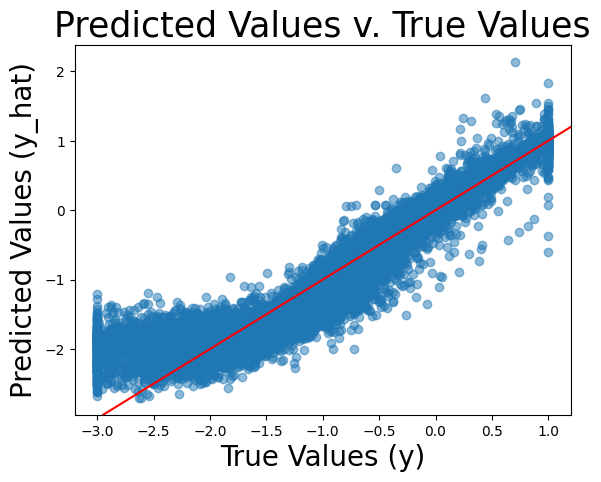

In [6]:
# Plot of y_hat against y, with a one-to-one line overlayed
# plot y_hat against y
plt.scatter(y, y_hat, alpha=0.5)

# lables
plt.xlabel("True Values (y)", fontsize=20)
plt.ylabel("Predicted Values (y_hat)", fontsize=20)
plt.title("Predicted Values v. True Values", fontsize=25)

# one-to-one line overlay
plt.axline([0, 0], slope=1, color="red")

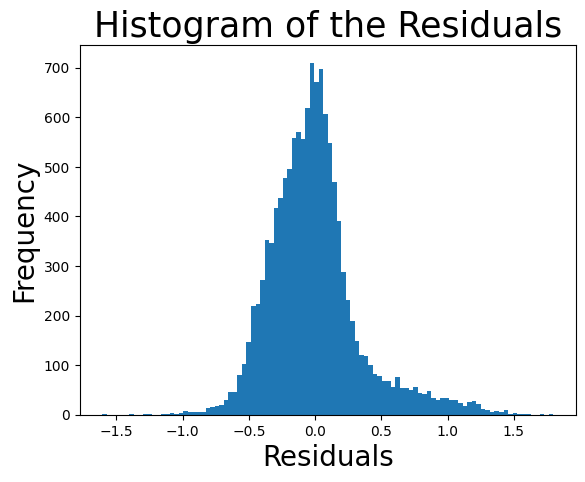

In [7]:
# Plot a histogram of the residuals
residual = y_hat - y
num_bins = 100
plt.hist(residual, num_bins)
plt.title("Histogram of the Residuals", fontsize=25)
plt.xlabel("Residuals", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Residuals v. True Values')

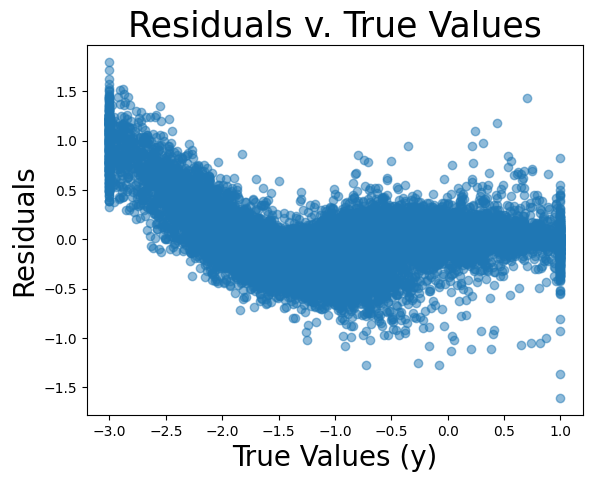

In [8]:
# Plot of the residuals against y
plt.scatter(y, residual, alpha=0.5)
# lables
plt.xlabel("True Values (y)", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.title("Residuals v. True Values", fontsize=25)

## Heat Maps 

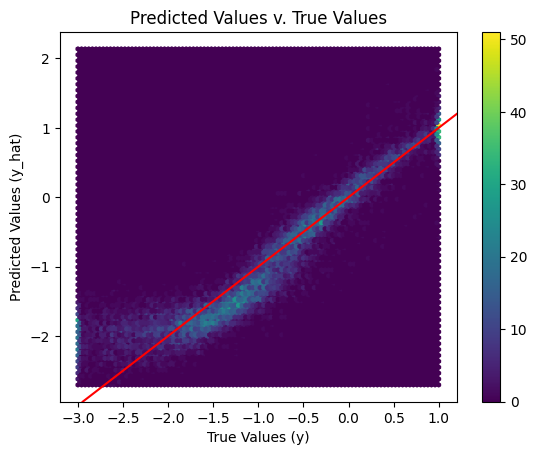

In [9]:
# Heat map of y_hat against y

# create the heatmap of y_hat against y
plt.hexbin(y, y_hat, cmap="viridis")
# set the size of the graph
plt.axis("auto")
# lables
plt.xlabel("True Values (y)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Predicted Values v. True Values")
# one-to-one line overlay
plt.axline([0, 0], slope=1, color="red")
plt.colorbar()

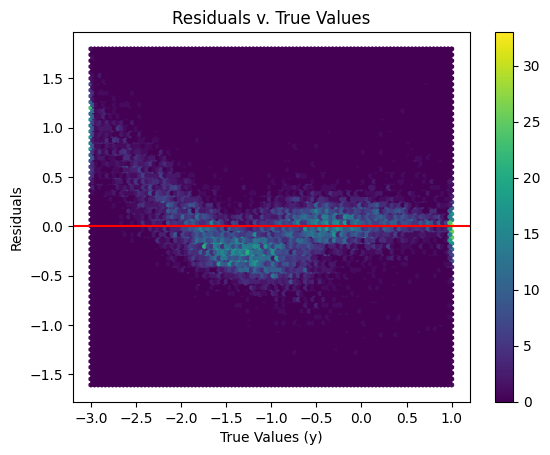

In [10]:
# Heat map of the residuals against y

# create the heatmap of residuals against y
plt.hexbin(y, residual, cmap="viridis")
# set the size of the graph
plt.axis("auto")
# lables
plt.xlabel("True Values (y)")
plt.ylabel("Residuals")
plt.title("Residuals v. True Values")
# zero horizontal line overlay
plt.axline([0, 0], slope=0, color="red")
plt.colorbar()

## Sensitivity Analysis

In [18]:
percentage = 2 # in %; 2%, 5%, 10%
sensitivity_analysis(ds, network, percentage)

AttributeError: Exception encountered when calling layer 'model' (type Functional).

cannot set attribute '_keras_mask' on a 'DataArray' object. Use __setitem__ styleassignment (e.g., `ds['name'] = ...`) instead of assigning variables.

Call arguments received by layer 'model' (type Functional):
  • inputs=<xarray.DataArray 'x' (sample: 250000, features: 9)>
array([[  69.62562073, 1018.63032043,   74.04802216, ...,  257.7943219 ,
         256.27431763,  254.13532532],
       [   7.88119042, 1018.63032043,   59.24981964, ...,  269.45533264,
         264.8523053 ,  260.80132568],
       [  12.85048044, 1018.63032043,   65.53042114, ...,  271.21833313,
         265.44330872,  260.71032227],
       ...,
       [  55.63482178, 1030.63032043,   82.24171722, ...,  259.20432556,
         257.07732666,  254.9193219 ],
       [  46.12621964, 1005.63032043,   64.02091873, ...,  267.1403302 ,
         262.60731018,  258.85532654],
       [  36.5028199 , 1018.63032043,   20.78552044, ...,  259.1943158 ,
         255.78132141,  255.58431519]])
Coordinates:
  * features  (features) <U20 'viewing_zenith_angle' 'spress' ... 'bt_12000'
Dimensions without coordinates: sample
  • training=None
  • mask=None